<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gfm050\AppData\Local\Temp\ipykernel_2076\560930948.py:33: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Modos Espaciais $\phi_n(x)$')
C:\Users\gfm050\AppData\Local\Temp\ipykernel_2076\560930948.py:35: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi_n(x)$')


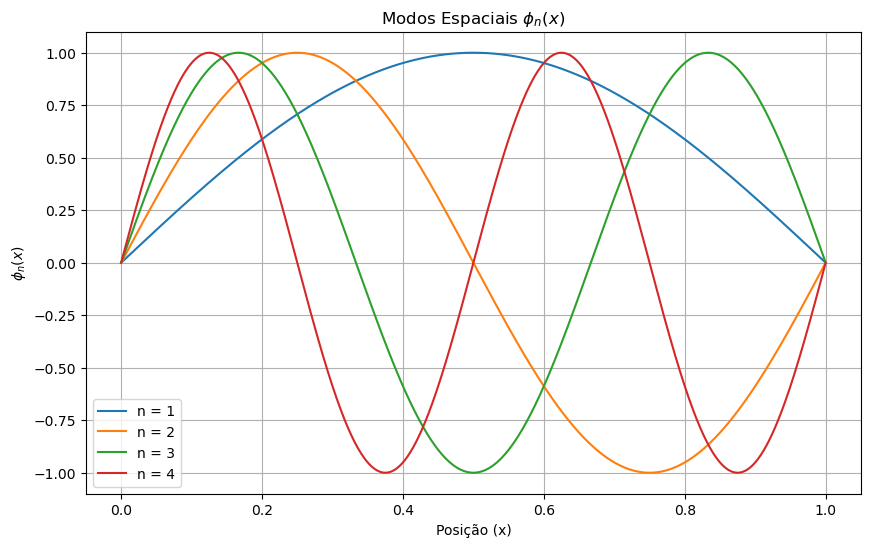

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  # Comprimento da corda
c = 1.0  # Velocidade da onda
n_modes = 4  # Número de modos

# Função para calcular phi_n(x)
def phi_n(x, n, L):
   '''
     Calcula phi(x), modos de vibração da corda

     Args:
       x = posição
       n = número de modos
       L = comprimento da corda

     Returns:
       phi(x)

   '''

   return np.sin(n * np.pi * x / L)

# Gerar pontos espaciais
x = np.linspace(0, L, 1000)

# Plotar os modos
plt.figure(figsize=(10, 6))
for n in range(1, n_modes + 1):
    plt.plot(x, phi_n(x, n, L), label=f'n = {n}')

plt.title('Modos Espaciais $\phi_n(x)$')
plt.xlabel('Posição (x)')
plt.ylabel('$\phi_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gfm050\AppData\Local\Temp\ipykernel_2076\2042661871.py:35: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Modos Espaciais $\phi_n(x)$ (Diferenças Finitas)")
C:\Users\gfm050\AppData\Local\Temp\ipykernel_2076\2042661871.py:37: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi_n(x)$")


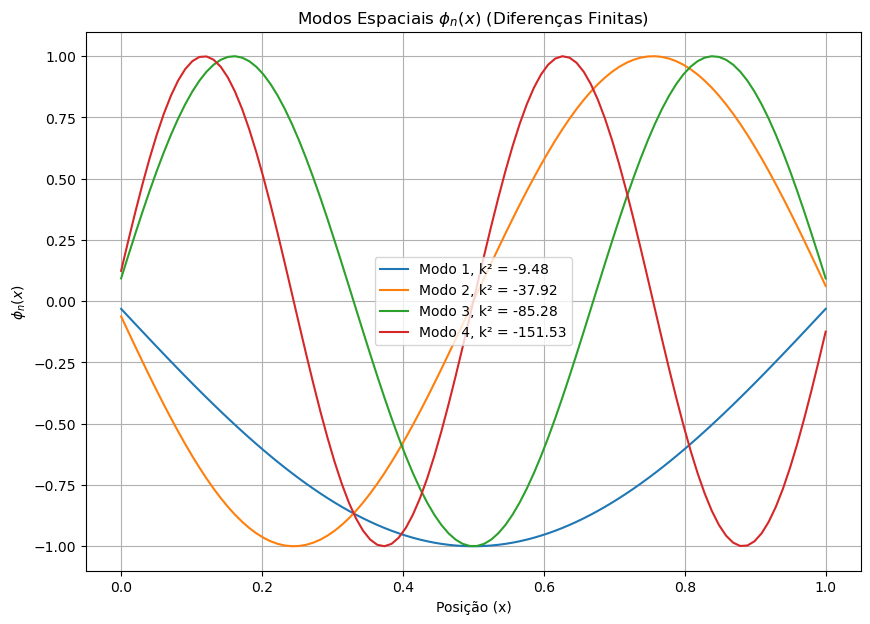

Autovalores numéricos (k²): [-3.91945182e+04 -3.91660818e+04 -3.91187185e+04 -3.90524740e+04
 -3.89674125e+04 -3.88636161e+04 -3.87411854e+04 -3.86002388e+04
 -3.84409126e+04 -3.82633609e+04 -3.80677556e+04 -3.78542859e+04
 -3.76231583e+04 -3.73745963e+04 -3.71088405e+04 -3.68261480e+04
 -3.65267923e+04 -3.62110628e+04 -3.58792652e+04 -3.55317204e+04
 -3.51687646e+04 -3.47907490e+04 -3.43980393e+04 -3.39910153e+04
 -3.35700709e+04 -3.31356132e+04 -3.26880627e+04 -3.22278523e+04
 -3.17554271e+04 -3.12712444e+04 -3.07757723e+04 -3.02694904e+04
 -2.97528883e+04 -2.92264660e+04 -2.86907326e+04 -2.81462064e+04
 -2.75934142e+04 -2.70328909e+04 -2.64651787e+04 -2.58908267e+04
 -2.53103908e+04 -2.47244323e+04 -2.41335183e+04 -2.35382202e+04
 -2.29391142e+04 -2.23367797e+04 -2.17317994e+04 -2.11247588e+04
 -2.05162449e+04 -1.99068466e+04 -1.92971534e+04 -1.86877551e+04
 -1.80792412e+04 -1.74722006e+04 -1.68672203e+04 -1.62648858e+04
 -1.56657798e+04 -1.50704817e+04 -1.44795677e+04 -1.38936092e+

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.sparse import diags
#from scipy.sparse.linalg import eigs
from numpy.linalg import eigh


# Parâmetros do problema
L = 1.0          # Comprimento da corda
N = 100          # Número de pontos
dx = L / (N - 1) 

# Construir a matriz tridiagonal do operador d²/dx²
diagonals = [-1 * np.ones(N-1), 2 * np.ones(N), -1 * np.ones(N-1)]
A = np.diag(diagonals[0], -1) + np.diag(diagonals[1], 0) + np.diag(diagonals[2], 1)
A *= 1/(dx**2)


# Resolver autovalores (k² = -λ)
eigenvalues, eigenvectors = eigh(A) 
k_squared = -eigenvalues.real  # k² = -λ

# Verificar os autovalores teóricos (k_n = nπ/L)
n_values = np.arange(1, 7)
k_theoretical = (n_values * np.pi / L)**2

# Plotar os autovetores (modos espaciais)
x = np.linspace(0, L, N)
plt.figure(figsize=(10, 7))
for i in range(4):  # Plotar os 4 primeiros modos
    mode = eigenvectors[:, i].real
    mode = mode / np.max(np.abs(mode))  # Normalizar
    plt.plot(x, mode, label=f'Modo {i+1}, k² = {k_squared[i]:.2f}')

plt.title("Modos Espaciais $\phi_n(x)$ (Diferenças Finitas)")
plt.xlabel("Posição (x)")
plt.ylabel("$\phi_n(x)$")
plt.legend()
plt.grid(True)
plt.show()

print("Autovalores numéricos (k²):", np.sort(k_squared))
print("Autovalores teóricos (k²):", k_theoretical)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from scipy.sparse import diags
# from scipy.sparse.linalg import eigs
from numpy.linalg import eigh
from IPython.display import HTML


L = 1.0           # Comprimento da corda
N = 100           # Número de pontos
dx = L / (N - 1)  # Espaçamento da grade
c = 1.0           # Velocidade da onda

# matriz tridiagonal do operador d²/dx²
diagonals = [-1 * np.ones(N-1), 2 * np.ones(N), -1 * np.ones(N-1)]
A = np.diag(diagonals[0], -1) + np.diag(diagonals[1], 0) + np.diag(diagonals[2], 1)
A *= 1/(dx**2)

# autovalores (k² = -λ)
eigenvalues, eigenvectors = eigh(A)
print(eigenvalues[0:5])
k_values = np.sqrt(eigenvalues)
omega_values = c * k_values


sorted_indices = np.argsort(omega_values)
omega_values = omega_values[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Normalizar os autovetores
eigenvectors = eigenvectors / np.max(np.abs(eigenvectors), axis=0)

# Grade espacial
x = np.linspace(0, L, N)

# Preparar a figura e os subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Animação dos 4 Primeiros Modos de Vibração', fontsize=16)
axes = axes.flatten()

# Inicializar linhas para cada modo
lines = []
for i, ax in enumerate(axes):
    line, = ax.plot(x, eigenvectors[:, i].real, 'b-', linewidth=2)
    ax.set_title(f'Modo {i+1}, ω = {omega_values[i]:.2f}')
    ax.set_xlim(0, L)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)
    lines.append(line)

# Função de animação
def update(t):
    for i, line in enumerate(lines):
        # Solução temporal: ϕ(x) * cos(ωt)
        y = eigenvectors[:, i].real * np.cos(omega_values[i] * t)
        line.set_ydata(y)
    return lines

# Criar a animação
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 100),
                    interval=50, blit=True)

# Converter para HTML
plt.close()  # Fechar a figura para evitar duplicação
html_output = HTML(ani.to_html5_video())

# Exibir a animação HTML
html_output

[  9.48183451  37.91816499  85.28148111 151.52596194 236.5875202 ]
